In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Obtain and visualize the dataset

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/amandeepsaini/scikit_learn_data


In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [11]:
print(faces.images.shape)
print(faces.data.shape)

(400, 64, 64)
(400, 4096)


In [9]:
faces.images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

In [10]:
faces.data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

Faces data and images are the same, data is just flattened

In [41]:
X = faces.data
images = faces.images
y = faces.target

In [110]:
def show_mult_imgs(img_list, columns=5, rows=5, grayscale=True):
    fig = plt.figure(figsize=(columns, rows))
    for i in range(1, columns*rows + 1):
        fig.add_subplot(rows, columns, i)
        if i - 1 < len(img_list):
            if grayscale:
                plt.imshow(img_list[i - 1], cmap="gray")
            else:
                plt.imshow(img_list[i - 1])

        plt.axis("off")
    plt.show()

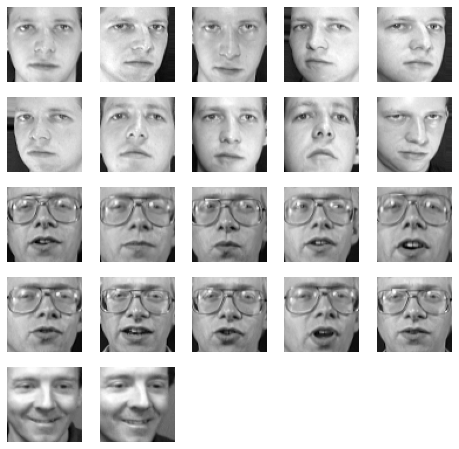

In [37]:
show_mult_imgs(images[:22])

In [31]:
len(np.unique(y))

40

In [33]:
unique_imgs = {}
for index, y_id in enumerate(y):
    if not y_id in unique_imgs:
        unique_imgs[y_id] = images[index]

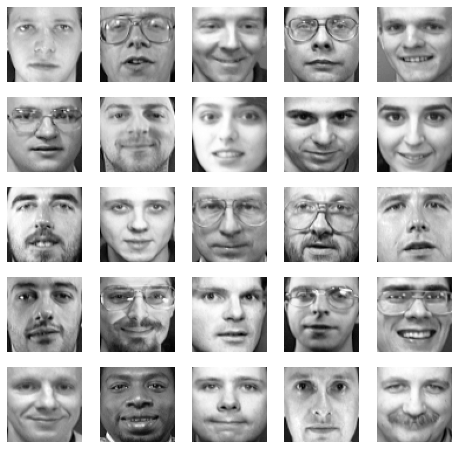

In [38]:
show_mult_imgs(list(unique_imgs.values()))

# Split the Data

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    img_train, img_test = images[train_index], images[test_index]


In [58]:
len(y_train), len(y_test)

(320, 80)

# K-Means

In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
y_pred = kmeans.fit_predict(X_train)

# for i in range(5, 10)


In [105]:
def visualize_clusters(y_pred, num_clusters, columns=5, rows=5):
    for i in range(num_clusters):
        img_list = []
        for index, label in enumerate(y_pred):
            if label == i:
                img_list.append(img_train[index])
        print("cluster", i)
        print("Contains", len(img_list), "images")
        show_mult_imgs(img_list, columns=columns, rows=rows)

cluster 0
Contains 40 images


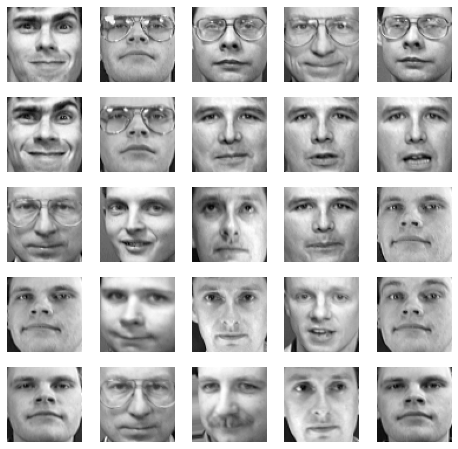

cluster 1
Contains 21 images


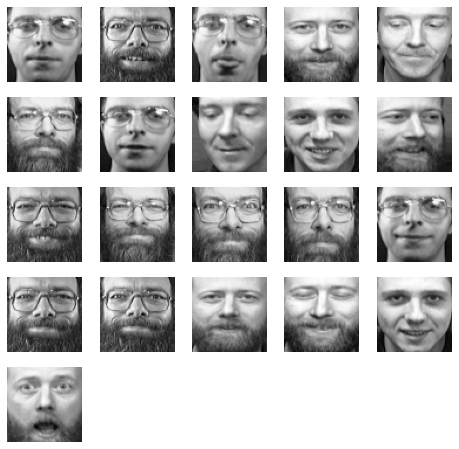

cluster 2
Contains 25 images


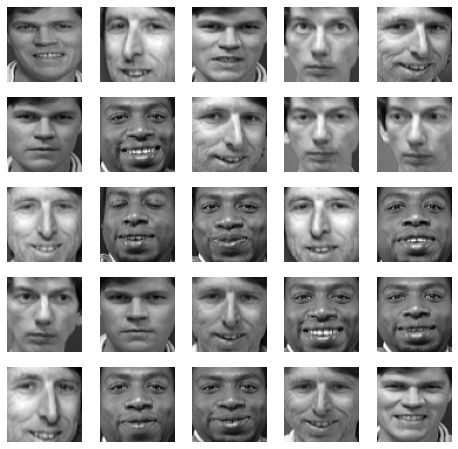

cluster 3
Contains 25 images


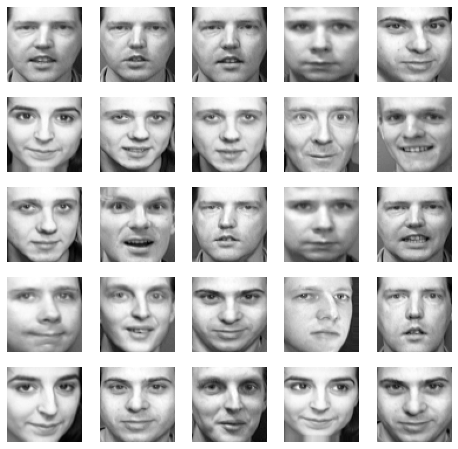

cluster 4
Contains 47 images


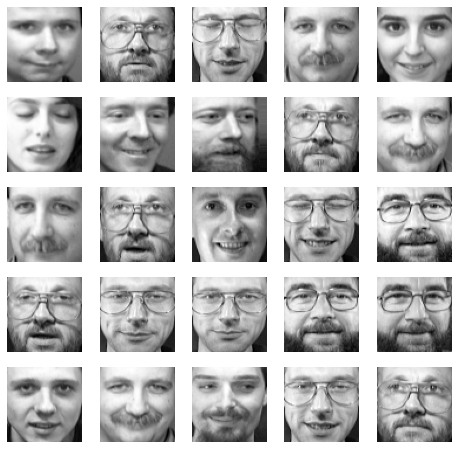

cluster 5
Contains 37 images


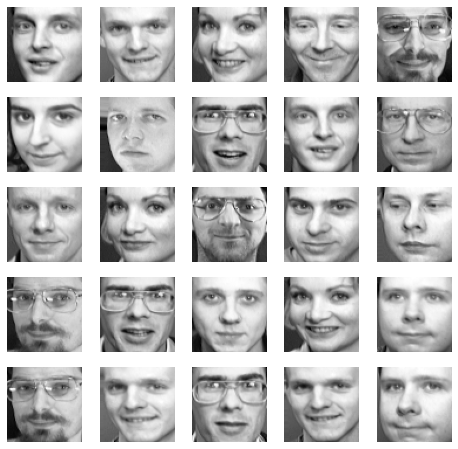

cluster 6
Contains 36 images


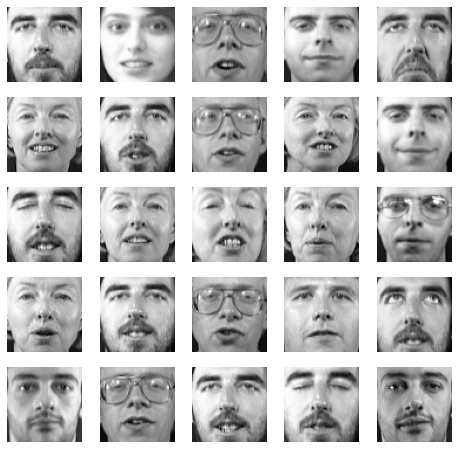

cluster 7
Contains 39 images


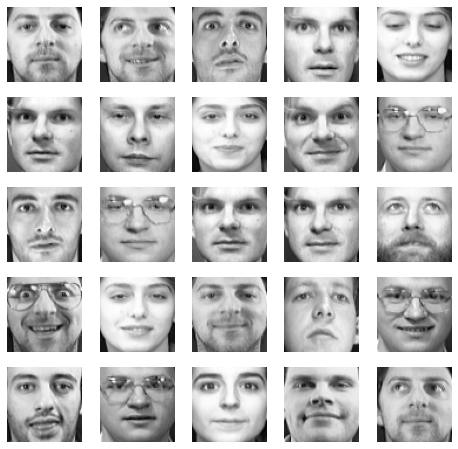

cluster 8
Contains 39 images


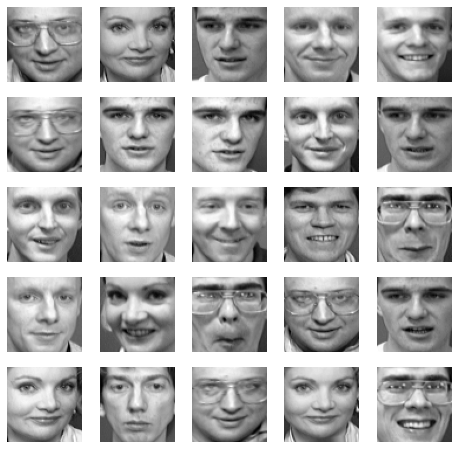

cluster 9
Contains 11 images


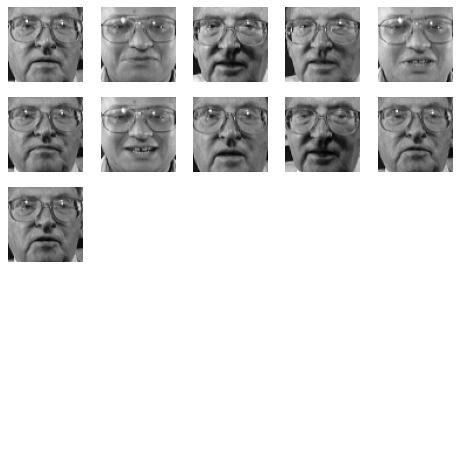

In [81]:
visualize_clusters(y_pred, 10)
    

### Intesting! We do see similair images grouped together. Especially in cluster 9. Lets see if we can optimize number of clusters

2 0.15156598 26654.689453125
4 0.106986314 22527.892578125
6 0.09334795 20896.935546875
8 0.09153158 19749.890625
10 0.0875248 19036.033203125
12 0.09068985 18220.431640625
14 0.09819248 17614.2734375
16 0.09476778 17028.162109375
18 0.09740425 16504.15625
20 0.10150144 16045.990234375
22 0.11804186 15345.1083984375
24 0.11421019 14959.724609375
26 0.12009852 14536.162109375
28 0.11444953 14207.17578125
30 0.13163404 13686.123046875
32 0.1372878 13245.9150390625
34 0.14387177 12909.5048828125
36 0.14079331 12724.6103515625
38 0.14066026 12335.11328125
40 0.14019388 12082.8701171875
42 0.15444103 11833.0400390625
44 0.14850917 11530.798828125
46 0.16009781 11216.21484375
48 0.15235943 11099.3193359375


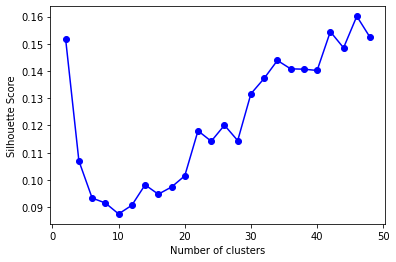

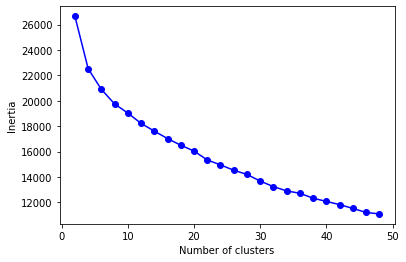

In [70]:
from sklearn.metrics import silhouette_score

def compare_clusters(start=2, end=50, stepsize=2)
    s_scores = []
    num_clusters = []
    inertias = []
    for i in range(2, 50, 2):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        s_score = silhouette_score(X, kmeans.labels_)
        inertia = kmeans.inertia_

        print(i, s_score, inertia)
        s_scores.append(s_score)
        inertias.append(inertia)
        num_clusters.append(i)

    plt.figure()
    plt.plot(num_clusters, s_scores, "bo-")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")

    plt.figure()
    plt.plot(num_clusters, inertias, "bo-")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")

    plt.show()


10 0.094050825 19018.826171875
20 0.11000947 15797.0283203125
30 0.13067204 13811.0341796875
40 0.14521243 11981.0556640625
50 0.16897531 10567.994140625
60 0.17534599 9623.953125
70 0.1846345 8652.322265625
80 0.18889698 8059.5458984375
90 0.19776891 7281.96533203125


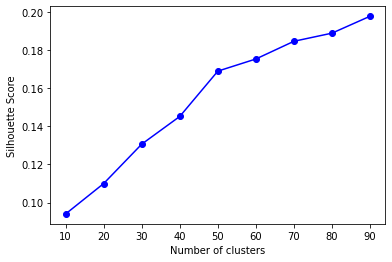

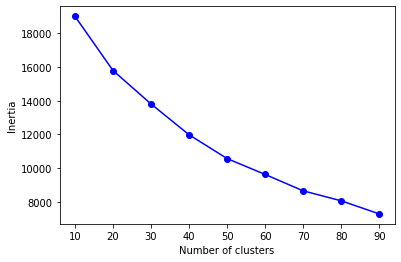

In [71]:
from sklearn.metrics import silhouette_score

s_scores = []
num_clusters = []
inertias = []
for i in range(10, 100, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    s_score = silhouette_score(X, kmeans.labels_)
    inertia = kmeans.inertia_

    print(i, s_score, inertia)
    s_scores.append(s_score)
    inertias.append(inertia)
    num_clusters.append(i)

plt.figure()
plt.plot(num_clusters, s_scores, "bo-")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

plt.figure()
plt.plot(num_clusters, inertias, "bo-")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

plt.show()
    

In [79]:
from sklearn.metrics import silhouette_score

def compare_clusters(start=2, end=50, stepsize=2):
    s_scores = []
    num_clusters = []
    inertias = []
    for i in range(start, end, stepsize):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        s_score = silhouette_score(X, kmeans.labels_)
        inertia = kmeans.inertia_

        print(i, s_score, inertia)
        s_scores.append(s_score)
        inertias.append(inertia)
        num_clusters.append(i)

    plt.figure()
    plt.plot(num_clusters, s_scores, "bo-")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")

    plt.figure()
    plt.plot(num_clusters, inertias, "bo-")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")

    plt.show()

2 0.15156598 26654.689453125
4 0.106979005 22525.734375
6 0.09701736 20901.357421875
8 0.08790885 19875.677734375
10 0.09033104 18990.712890625
12 0.095522195 18239.86328125
14 0.09008131 17526.18359375
16 0.09938513 16973.4296875
18 0.09810114 16446.744140625
20 0.10147939 15866.75390625
22 0.11093794 15394.1181640625
24 0.11624525 14958.8037109375
26 0.12757379 14412.8427734375
28 0.13170421 13990.7265625
30 0.12875237 13813.39453125
32 0.12719966 13361.3818359375
34 0.12769462 13036.4052734375
36 0.13856913 12626.515625
38 0.14616156 12326.8525390625
40 0.14913143 12073.23828125
42 0.15081275 11742.388671875
44 0.15202214 11543.328125
46 0.15491752 11183.4912109375
48 0.16085891 10948.89453125


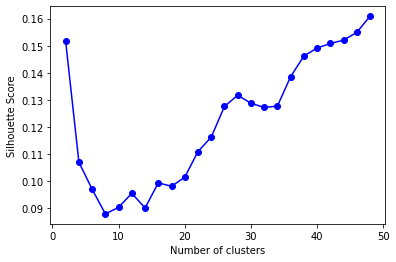

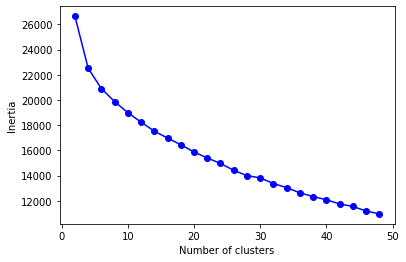

In [75]:
compare_clusters()

10 0.099222906 18881.15625
20 0.10659857 15872.619140625
30 0.12779303 13718.0517578125
40 0.14407611 12013.6279296875
50 0.15529181 10787.1064453125
60 0.17133766 9704.224609375
70 0.18467462 8784.017578125
80 0.19338082 7988.1357421875
90 0.1991438 7298.33203125


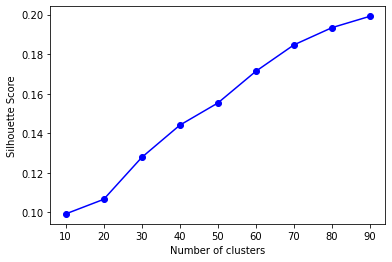

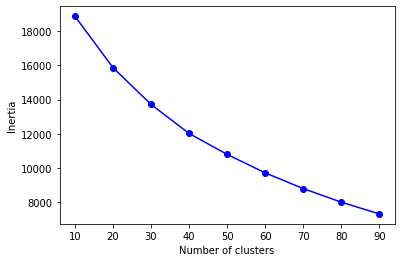

In [80]:
compare_clusters(10,100,10)

#### Hmmm, there are no clear elbows or peaks in these graphs as we continue increasing the number of clusters. SInce there's only 320 instances in the training set, a large number of clusters would be problematic. We could have also plotted the purity scores, which may have given some intutition, but purity tends to get higher with the number of clusters as well. Lets visualize results from the 100 cluster one

cluster 0
Contains 1 images


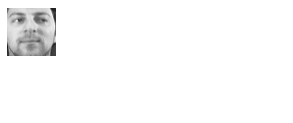

cluster 1
Contains 3 images


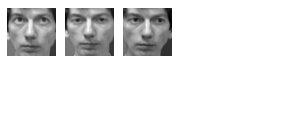

cluster 2
Contains 7 images


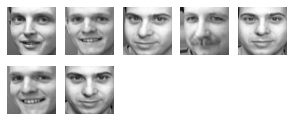

cluster 3
Contains 5 images


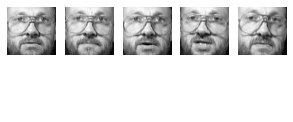

cluster 4
Contains 3 images


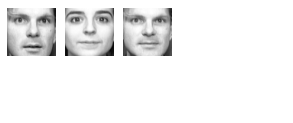

cluster 5
Contains 5 images


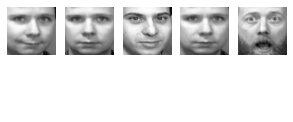

cluster 6
Contains 4 images


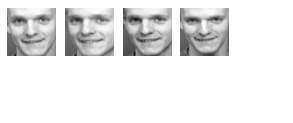

cluster 7
Contains 4 images


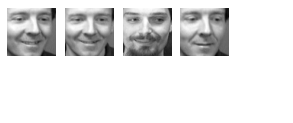

cluster 8
Contains 3 images


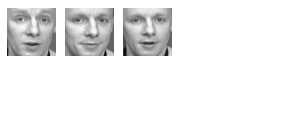

cluster 9
Contains 3 images


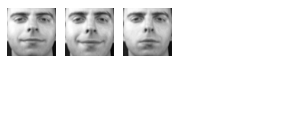

In [115]:
kmeans_100 = KMeans(n_clusters=100)
y_pred_100 = kmeans_100.fit_predict(X_train)

# Lets visualize the first 10 clusters
visualize_clusters(y_pred_100, 10, columns=5, rows=2)


#### Looks pretty good! It seems like most people in the set are the same ones. Lets calculate a purity score on this

In [97]:
from sklearn import metrics

# This function is obtained from https://stackoverflow.com/questions/34047540/python-clustering-purity-metric
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [116]:
print("Purity:", purity_score(y_train, y_pred_100))

Purity: 0.903125


#### Not bad! But of course, more clusters by default will lead to a higher purity (one instance per class for example). Lets see how 40 clusters does, since thats the number of unique faces we have

cluster 0
Contains 3 images


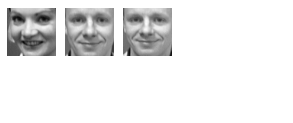

cluster 1
Contains 8 images


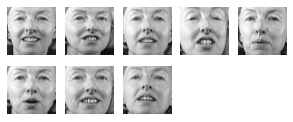

cluster 2
Contains 10 images


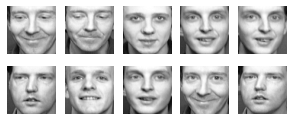

cluster 3
Contains 8 images


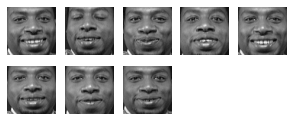

cluster 4
Contains 12 images


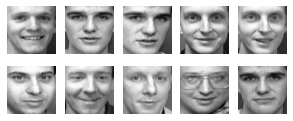

cluster 5
Contains 9 images


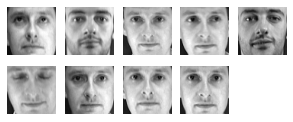

cluster 6
Contains 7 images


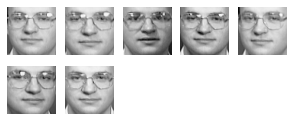

cluster 7
Contains 13 images


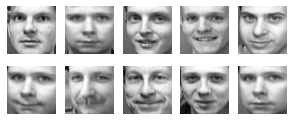

cluster 8
Contains 15 images


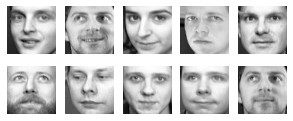

cluster 9
Contains 10 images


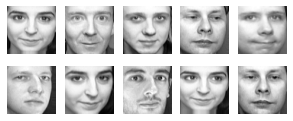

cluster 10
Contains 9 images


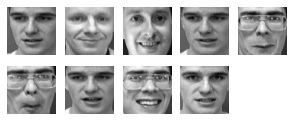

cluster 11
Contains 7 images


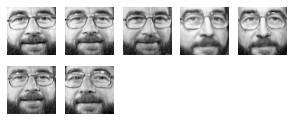

cluster 12
Contains 13 images


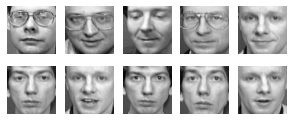

cluster 13
Contains 11 images


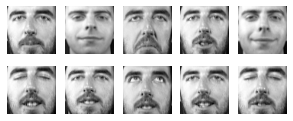

cluster 14
Contains 4 images


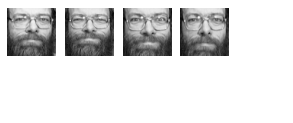

cluster 15
Contains 9 images


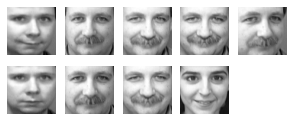

cluster 16
Contains 8 images


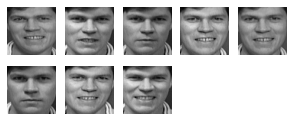

cluster 17
Contains 9 images


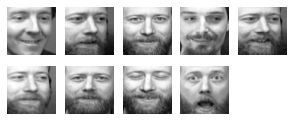

cluster 18
Contains 12 images


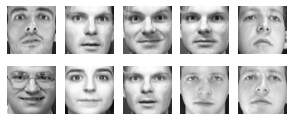

cluster 19
Contains 4 images


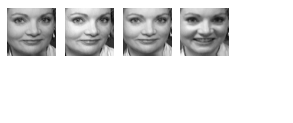

cluster 20
Contains 3 images


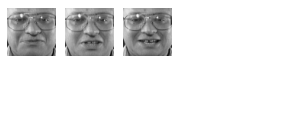

cluster 21
Contains 9 images


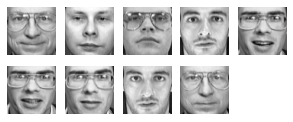

cluster 22
Contains 8 images


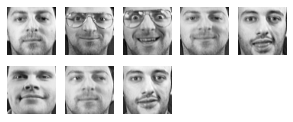

cluster 23
Contains 5 images


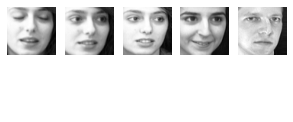

cluster 24
Contains 9 images


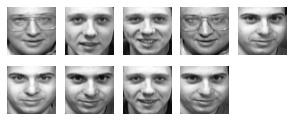

cluster 25
Contains 12 images


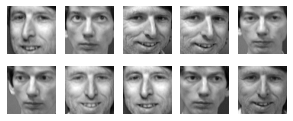

cluster 26
Contains 8 images


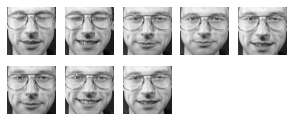

cluster 27
Contains 8 images


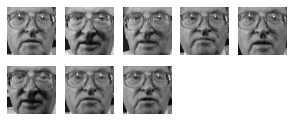

cluster 28
Contains 4 images


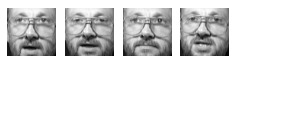

cluster 29
Contains 4 images


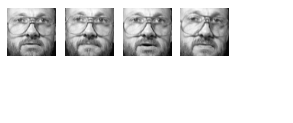

cluster 30
Contains 20 images


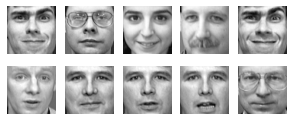

cluster 31
Contains 4 images


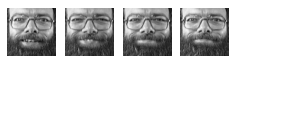

cluster 32
Contains 7 images


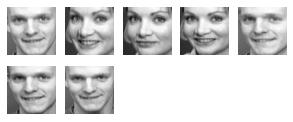

cluster 33
Contains 7 images


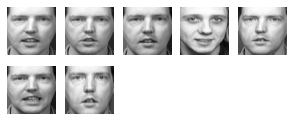

cluster 34
Contains 4 images


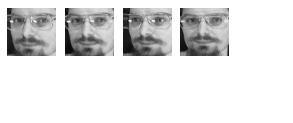

cluster 35
Contains 5 images


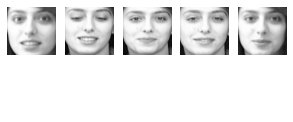

cluster 36
Contains 8 images


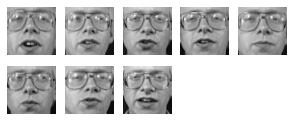

cluster 37
Contains 6 images


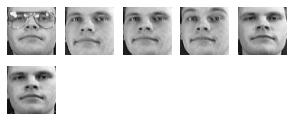

cluster 38
Contains 3 images


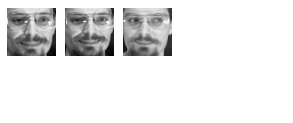

cluster 39
Contains 5 images


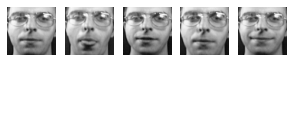

In [111]:
kmeans_40 = KMeans(n_clusters=40)
y_pred_40 = kmeans_40.fit_predict(X_train)

# Lets visualize 
visualize_clusters(y_pred_40, 40, columns=5, rows=2)

In [112]:
print("Purity:", purity_score(y_train, y_pred_40))

Purity: 0.65


# K-Means Dimensionality Reduction

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(scaled_X_train, y_train)

LogisticRegression(max_iter=1000)

In [126]:
acc = log_reg.score(scalar.transform(X_test), y_test)
print("Accuracy", acc)

Accuracy 0.975


#### Pretty Good! Lets see if clustering can help

In [137]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("kmeans", KMeans(n_clusters=100)),
    ("scale2", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('kmeans', KMeans(n_clusters=100)),
                ('scale2', StandardScaler()),
                ('log_reg', LogisticRegression(max_iter=1000))])

In [138]:
acc_pipeline = pipeline.score(X_test, y_test)
print("Accuracy", acc_pipeline)

Accuracy 0.9


#### Oh no, it got worse! Lets search the space a bit more

Accuracy for 10 is 0.525
Accuracy for 20 is 0.675
Accuracy for 30 is 0.8125
Accuracy for 40 is 0.8625
Accuracy for 50 is 0.8875
Accuracy for 60 is 0.9125
Accuracy for 70 is 0.8875
Accuracy for 80 is 0.9125
Accuracy for 90 is 0.8875
Accuracy for 100 is 0.8875
Accuracy for 110 is 0.8875
Accuracy for 120 is 0.8875
Accuracy for 130 is 0.8875
Accuracy for 140 is 0.9
Accuracy for 150 is 0.8875
Accuracy for 160 is 0.9
Accuracy for 170 is 0.9
Accuracy for 180 is 0.9
Accuracy for 190 is 0.9


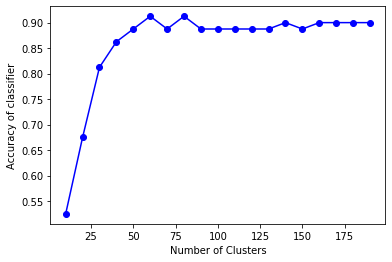

In [144]:
accuracies = []
num_clusters = []
for i in range(10, 200, 10):
    pipeline = Pipeline([
        ("scale", StandardScaler()),
        ("kmeans", KMeans(n_clusters=i)),
        ("scale2", StandardScaler()),
        ("log_reg", LogisticRegression(max_iter=1000)),
    ])
    pipeline.fit(X_train, y_train)
    acc_pipeline = pipeline.score(X_test, y_test)
    print("Accuracy for", i, "is", acc_pipeline)
    accuracies.append(acc_pipeline)
    num_clusters.append(i)

plt.plot(num_clusters, accuracies, "bo-")
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy of classifier")
plt.show()

    

#### It seems like we peak around 91% accuracy

# Gaussian Mixture Model + Generate New Faces

In [155]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train)
# gmm = GaussianMixture()
# Lets try Baysian GMM which can figure out number of clusters on its own
bgm = BayesianGaussianMixture(n_components=120, n_init=3)
bgm.fit(X_train_reduced)

BayesianGaussianMixture(n_components=120, n_init=3)

In [156]:
np.round(bgm.weights_, 2)

array([0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.03, 0.02, 0.02, 0.02, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.  ,
       0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.01, 0.  , 0.  , 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

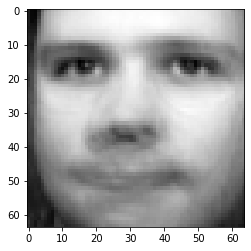

In [177]:
img_sampled = pca.inverse_transform(bgm.sample()[0])
plt.imshow(img_sampled.reshape(64,64), cmap="gray")
plt.show()

### WOW! We've just made a brand new face!!! Very Exciting :)

In [189]:
gen_images = []
for sample in bgm.sample(25)[0]:
    img_sampled = pca.inverse_transform(sample)
    gen_images.append(img_sampled.reshape(64,64))

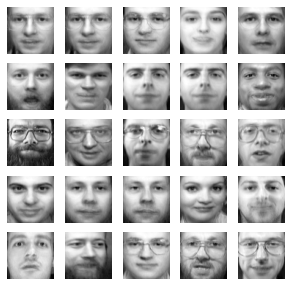

In [190]:
show_mult_imgs(gen_images)

# Reconstruct

#### Lets look at some images reconstructed after PCA

In [265]:
def reconstruct_and_show(img):
    reduced_img = pca.transform(img.reshape(1,-1))
    recon_img = pca.inverse_transform(reduced_img)
    recon_img = recon_img.reshape(64,64)
    fig = plt.figure()
    fig.add_subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    fig.add_subplot(1, 2, 2)
    plt.imshow(recon_img, cmap="gray") 
    recon_error = ((img - recon_img) ** 2).mean()
    plt.show()
    print("Reconstruction Error: ", recon_error)


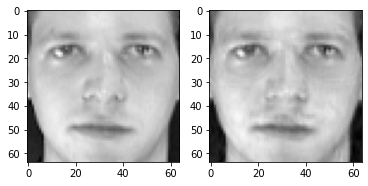

Reconstruction Error:  0.000259225


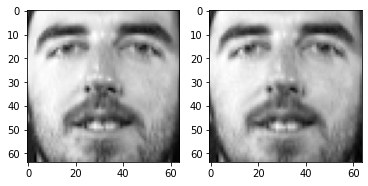

Reconstruction Error:  0.00018756272


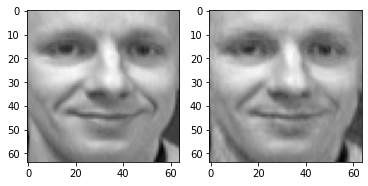

Reconstruction Error:  0.0002894052


In [250]:
reconstruct_and_show(images[0])
reconstruct_and_show(images[100])
reconstruct_and_show(images[200])

#### Lets Flip/Darken and see what happens

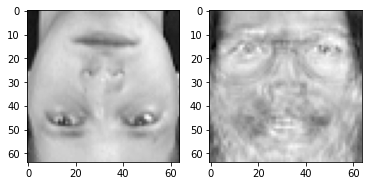

Reconstruction Error:  0.005159346


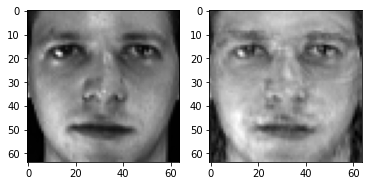

Reconstruction Error:  0.001127674


In [275]:
img_flipped = np.flip(images[0])
reconstruct_and_show(img_flipped)

img_dark = images[0]**3
reconstruct_and_show(img_dark)


#### Interesting!! It tries to reconstruct something similiar to the original faces. And the reconstuction error is a magnitude higher. We could use this as an Anomoly detection technique as well. Lets try on random and empty data

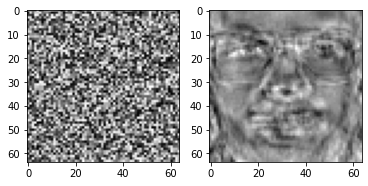

Reconstruction Error:  0.08108870979821683


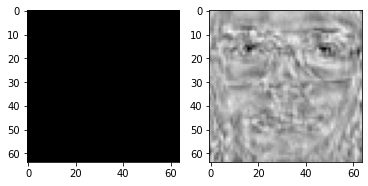

Reconstruction Error:  0.0018757461023217856


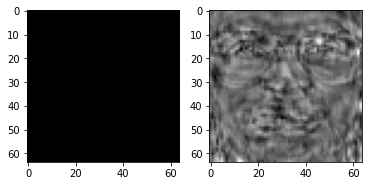

Reconstruction Error:  0.0013685895709552732


In [252]:
rand_img = np.random.rand(images[0].shape[0], images[0].shape[1])
reconstruct_and_show(rand_img)

img_ones = np.ones((images[0].shape[0], images[0].shape[1]))
reconstruct_and_show(img_ones)

img_zeros = np.zeros((images[0].shape[0], images[0].shape[1]))
reconstruct_and_show(img_zeros)


### Very Cool!